In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [64]:
# Load the data into a DataFrame
data = pd.read_csv('Dataset/Dataset Smart Irrigation Systems in Agriculture.csv')
data.head(10)

,id,temperature,pressure,altitude,soil_moisture,note,status,class,date,time
0,1,29.10,9984.53,12.21-,377,0,0,Very Dry,08/10/2022,22:06:24
1,2,29.08,9984.36,12.22-,379,0,0,Very Dry,08/10/2022,22:06:24
2,3,29.06,9984.56,12.20-,376,0,0,Very Dry,08/10/2022,22:06:24
3,4,29.05,9984.39,12.22-,377,0,0,Very Dry,08/10/2022,22:06:24
4,5,29.03,9984.42,12.21-,379,0,0,Very Dry,08/10/2022,22:06:24
5,6,29.02,9984.59,12.20-,376,0,0,Very Dry,08/10/2022,22:06:24
6,7,29.00,9984.42,12.21-,380,0,0,Very Dry,08/10/2022,22:06:24
7,8,28.99,9984.27,12.23-,380,0,0,Very Dry,08/10/2022,22:06:24
8,9,28.97,9984.10,12.24-,380,0,0,Very Dry,08/10/2022,22:06:24
9,10,28.96,9984.10,12.24-,379,0,0,Very Dry,08/10/2022,22:06:24


In [65]:
# Check the shape of the dataset
print(f"Dataset Shape: {data.shape}")


Dataset Shape: (4688, 10)


In [66]:
# Display column names and data types
print("Column Names and Data Types:")
print(data.info())

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4688 non-null   int64  
 1   temperature    4688 non-null   float64
 2   pressure       4688 non-null   float64
 3   altitude       4688 non-null   object 
 4   soil_moisture  4688 non-null   int64  
 5   note           4688 non-null   int64  
 6   status         4688 non-null   int64  
 7   class          4688 non-null   object 
 8   date           4688 non-null   object 
 9   time           4688 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 366.4+ KB
None


In [67]:
# Display basic statistics
print("Basic Statistics:")
print(data.describe(include='all'))

Basic Statistics:
                 id  temperature      pressure altitude  soil_moisture  \
count   4688.000000  4688.000000   4688.000000     4688    4688.000000   
unique          NaN          NaN           NaN      559            NaN   
top             NaN          NaN           NaN   13.36-            NaN   
freq            NaN          NaN           NaN       41            NaN   
mean    2344.500000    29.599089   9963.153215      NaN     243.692406   
std     1353.453361     5.842685   1383.602527      NaN      76.176855   
min        1.000000    27.970000  -2120.400000      NaN    -243.000000   
25%     1172.750000    28.630000   9935.255000      NaN     171.000000   
50%     2344.500000    29.180000   9969.535000      NaN     233.000000   
75%     3516.250000    29.990000   9975.700000      NaN     326.000000   
max     4688.000000   178.700000  99931.100000      NaN     480.000000   

               note       status     class        date      time  
count   4688.000000  4688.

In [68]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())



Missing Values:
id               0
temperature      0
pressure         0
altitude         0
soil_moisture    0
note             0
status           0
class            0
date             0
time             0
dtype: int64


In [69]:
# Check for duplicate rows
print(f"Number of Duplicate Rows: {data.duplicated().sum()}")

Number of Duplicate Rows: 0


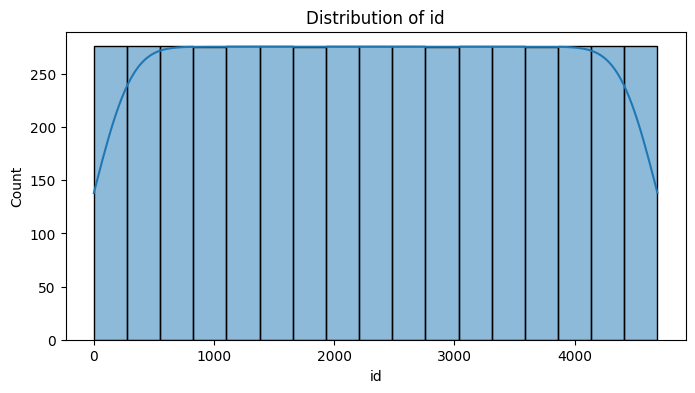

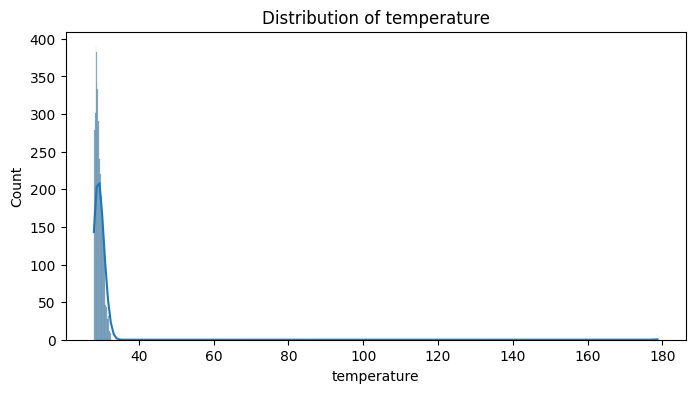

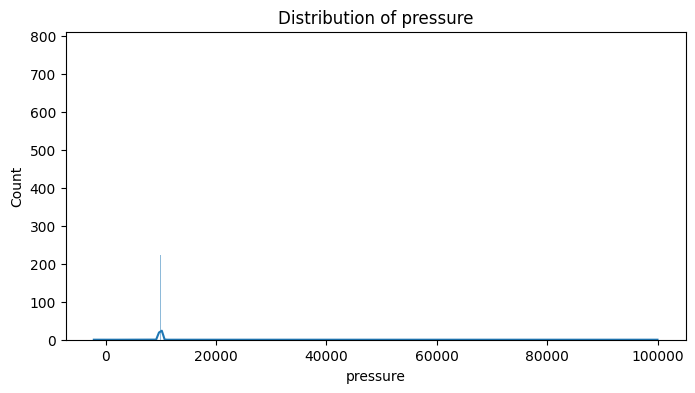

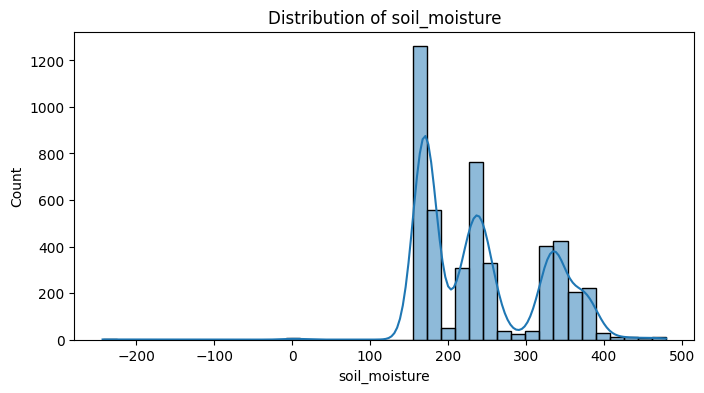

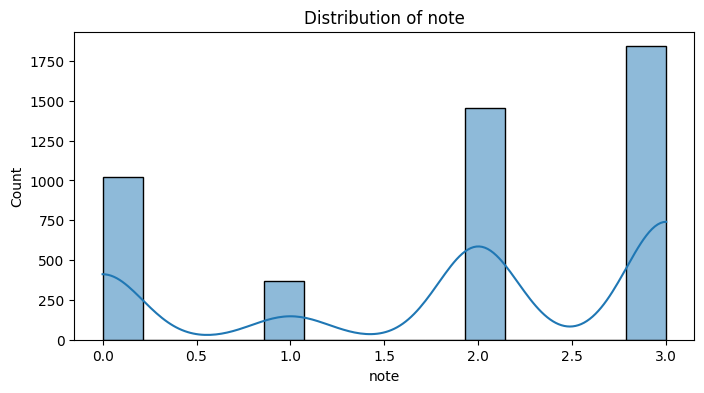

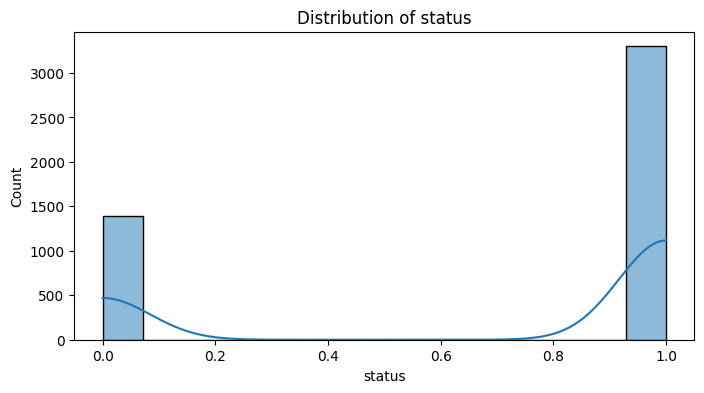

In [70]:
# Plot distribution of numeric features
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()




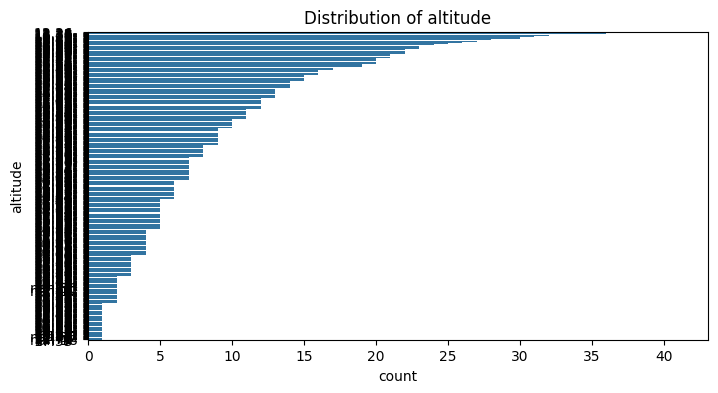

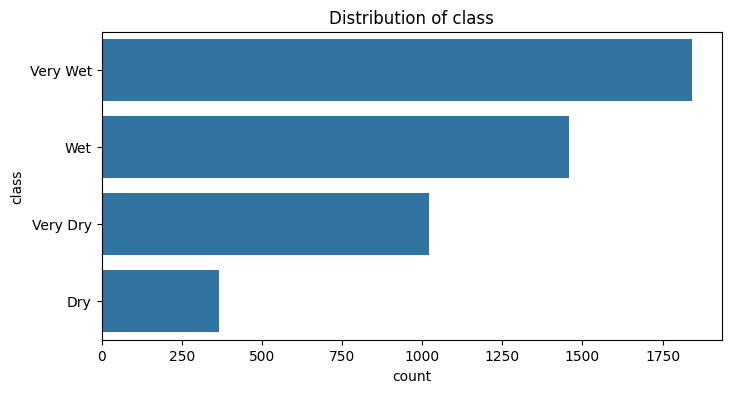

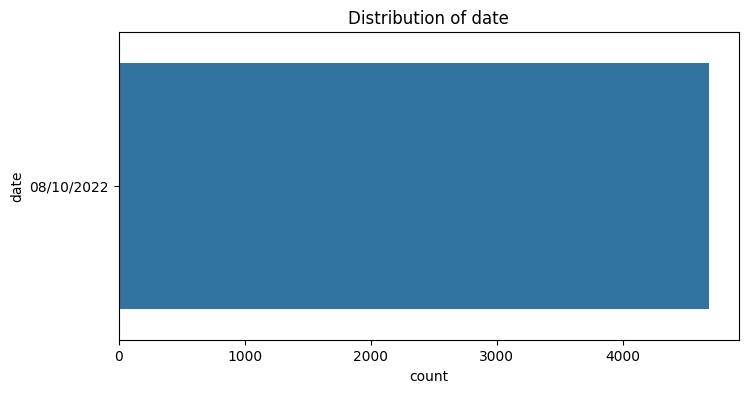

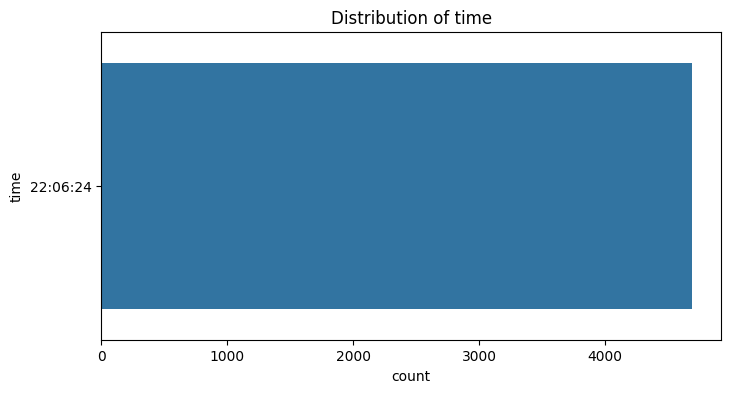

In [71]:
# Plot distribution of categorical features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=data[col], order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()

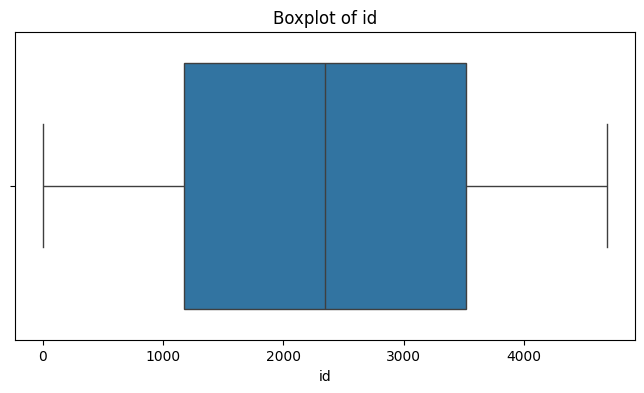

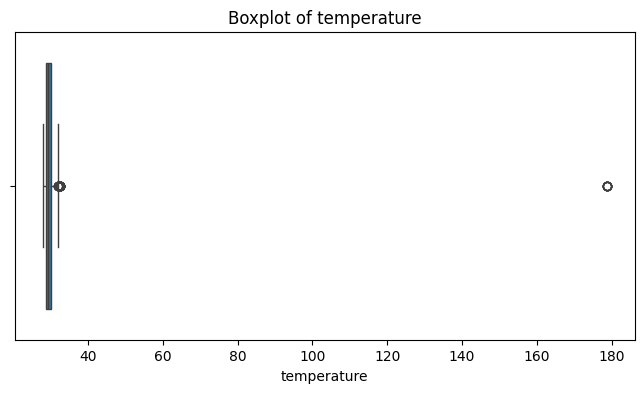

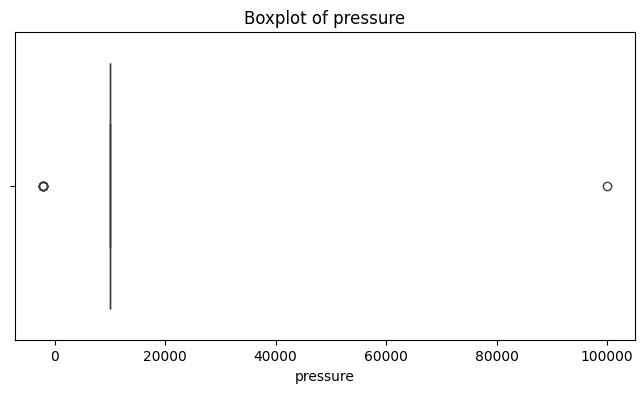

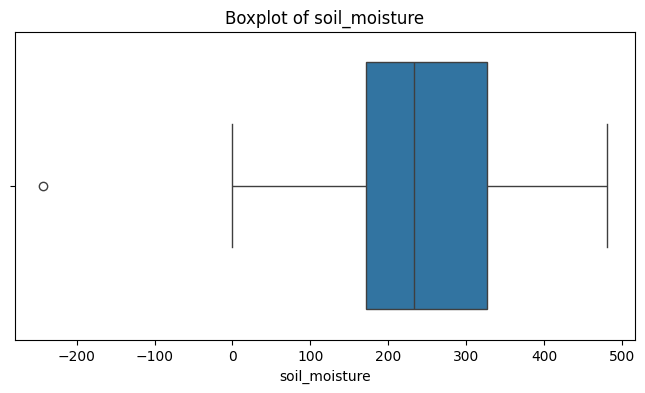

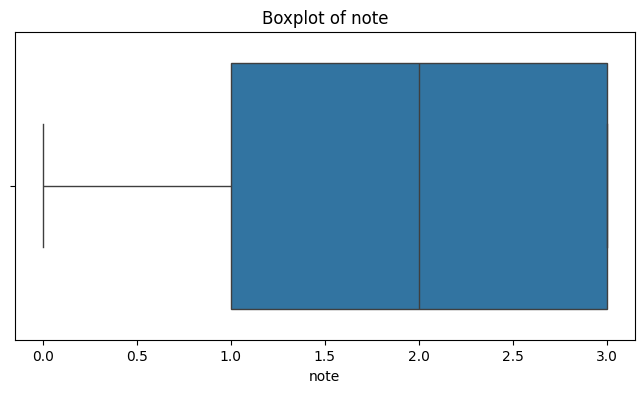

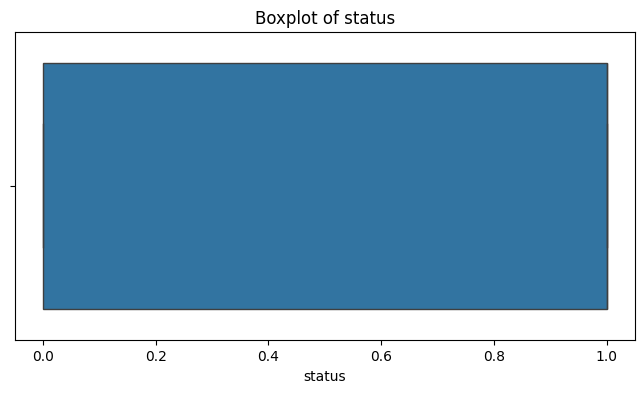

In [72]:
# Boxplot for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


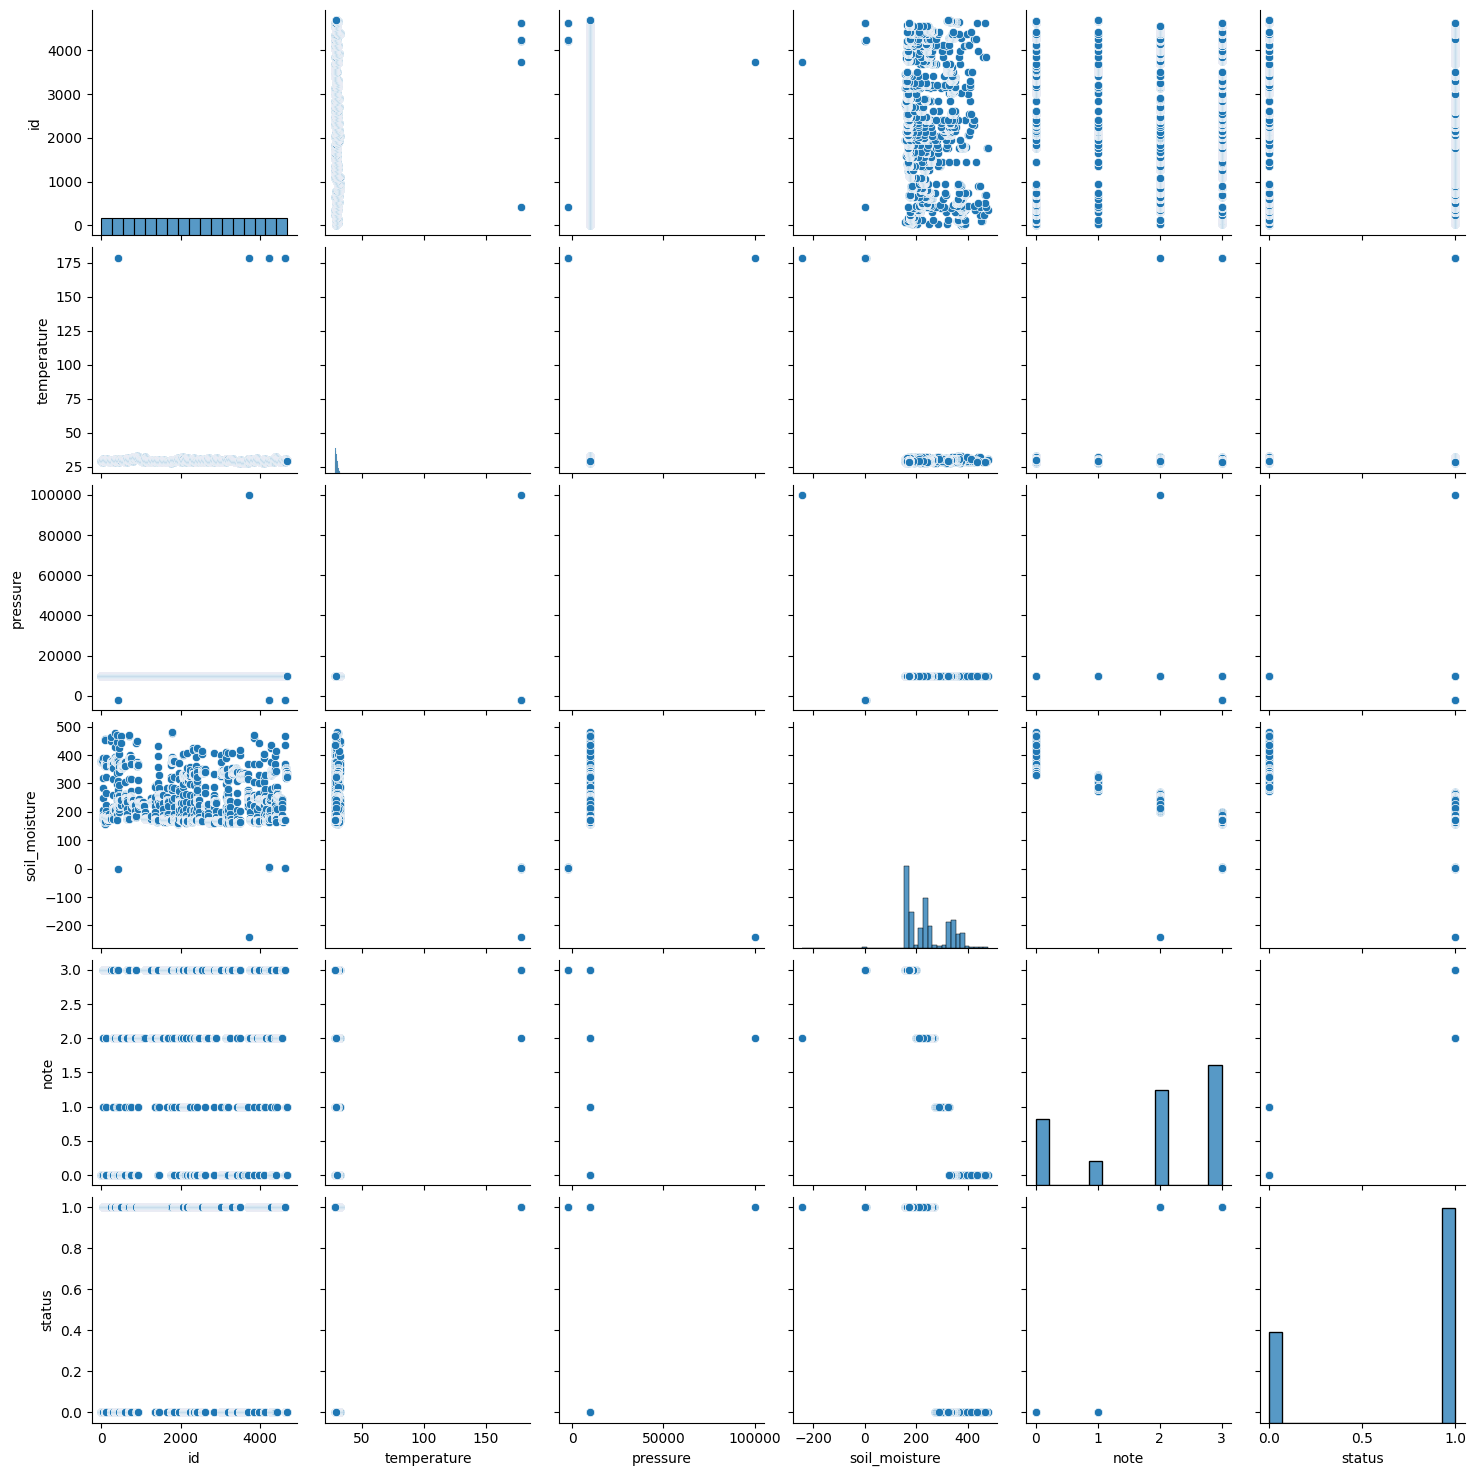

In [73]:
# Pairplot for numeric features
sns.pairplot(data[numeric_columns])
plt.show()


In [74]:
# Convert 'class' to numerical labels
print(data['class'].unique())
data['class'] = data['class'].astype('category').cat.codes
print(data['class'].unique())

['Very Dry' 'Dry' 'Wet' 'Very Wet']
[1 0 3 2]


In [75]:
# Clean the 'altitude' column by removing non-numeric characters and converting to float
data['altitude'] = data['altitude'].str.replace('[^0-9.]', '', regex=True).astype(float)

In [76]:
# Features and target
X = data[['temperature', 'pressure', 'altitude', 'soil_moisture']]
y = data['class']

In [77]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Train a model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
# Make predictions
y_pred = model.predict(X_test)

In [80]:
# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


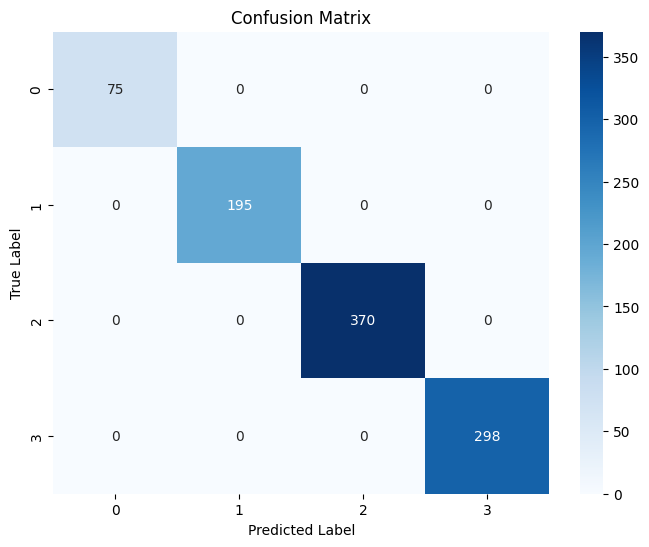

In [81]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [82]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00       195
           2       1.00      1.00      1.00       370
           3       1.00      1.00      1.00       298

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



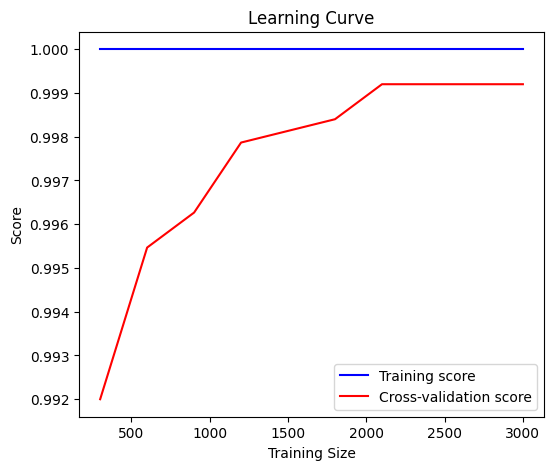

In [83]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Plot learning curve
plt.figure(figsize=(6, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score', color='b')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation score', color='r')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()


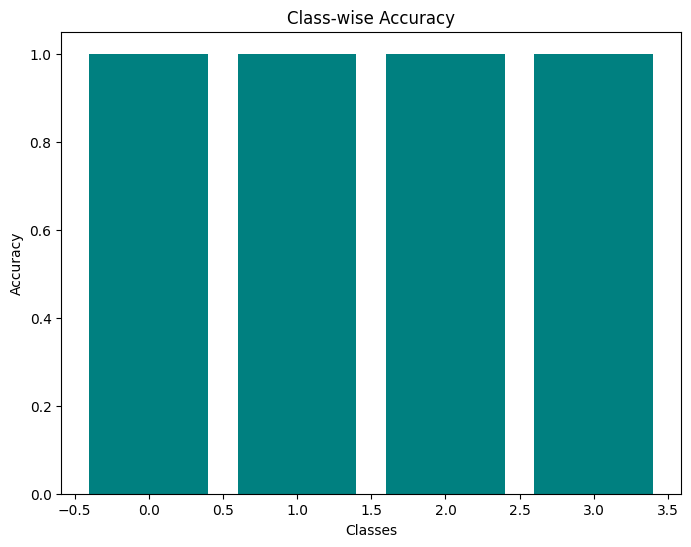

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def plot_classwise_accuracy(y_true, y_pred, classes):
    accuracy_per_class = {}
    
    for cls in classes:
        # Get boolean mask for the current class
        class_mask = (y_true == cls)
        
        # Calculate accuracy for this class
        accuracy_per_class[cls] = accuracy_score(y_true[class_mask], y_pred[class_mask])
    
    # Plot accuracy per class
    plt.figure(figsize=(8, 6))
    plt.bar(accuracy_per_class.keys(), accuracy_per_class.values(), color='teal')
    plt.title('Class-wise Accuracy')
    plt.xlabel('Classes')
    plt.ylabel('Accuracy')
    plt.show()

# Call the function to see accuracy per class
plot_classwise_accuracy(y_test, y_pred, classes=model.classes_)


In [85]:
# Save the model
joblib.dump(model, 'soil_moisture_model.pkl')
print("Model saved as 'soil_moisture_model.pkl'")

Model saved as 'soil_moisture_model.pkl'
